# Imports and Setup

-> Import the modules we need <br>
-> Setup some stuff

In [1]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setup seaborn style
sns.set_style("darkgrid")

# Polygonization

-> Get data on polygoniation <br>
-> Create data frame <br>
-> Process data

In [2]:
# get data on polygonization
data_file = "data.csv"

# create data frame
poly_df = pd.read_csv(data_file)

# rename some values for readability
poly_df.loc[poly_df['edge_selection'] == 1, 'edge_selection'] = 'rand_edge'
poly_df.loc[poly_df['edge_selection'] == 2, 'edge_selection'] = 'min_edge'
poly_df.loc[poly_df['edge_selection'] == 3, 'edge_selection'] = 'max_edge'

# drop onion runs that could not finish
poly_df.drop(poly_df[poly_df.points!=poly_df.points_on_poly].index, inplace = True)

## Run Times

### Plots

Plot run times

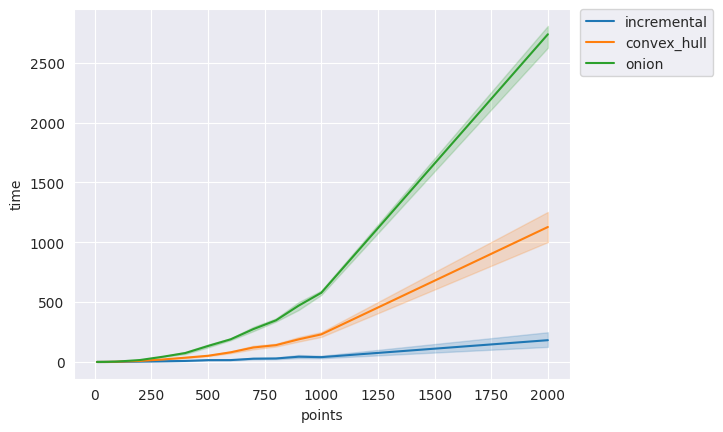

In [3]:
# draw time = f(number of points) for each algorithm
sns.lineplot(data=poly_df, x="points", y="time",hue="algorithm")

# setup legend location
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### Comments

Tests above are on all available point sets from size 10 to 2000.

Notice that the y axis (time) is in miliseconds.

From the plot above we draw the following conclusions on the speed of the algorithms:
- The fastest algorithm is incremental
- Followed by convex hull
- Followed by onion

## Poly area to CH area ratios

### Plots

Plot area to ch ratios

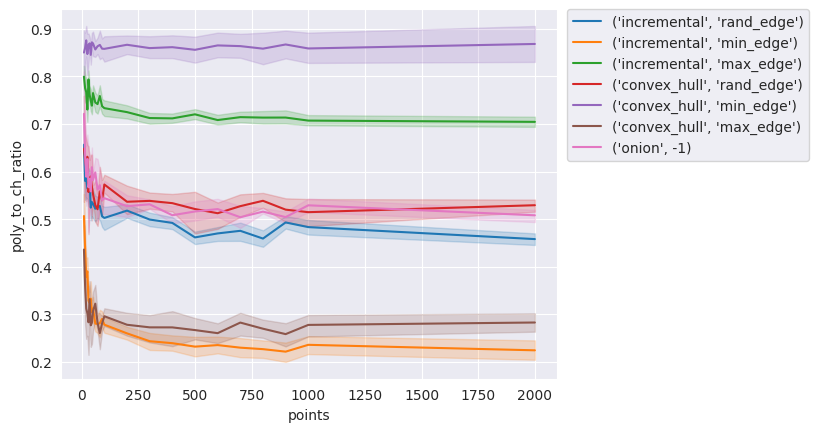

In [4]:
# draw poly_to_ch_ratio = f(number of points) for each (algorithm,edge_selection) combination
sns.lineplot(data=poly_df, x="points", y="poly_to_ch_ratio",\
             hue=poly_df[['algorithm', 'edge_selection']].apply(tuple, axis=1))

# setup legend location
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### Comments

Tests above are on all available point sets from size 10 to 2000.

From the plot above we draw the following conclusions:
- The convex hull algorithm (purple line - convex_hull,min_edge) creates better maximal polygons (about 0.85 ratio) than the incremental algorithm (green line - incremental,max_edge) (about 0.7 ratio)
- Both the incremental (orange line - incremental,min_edge) and convex hull (brown line - convex_hull,max_edge) algorithms create minimal polygons of similar quality, with the incremental algorithm making slighlty better ones (both are about 0.25)
- The onion algorithm (pink line - onion,-1) makes polygons with ratio of about 0.5. So do the incremental (blue line - incremental,rand_edge) and convex hull (red line - convex_hull,rand_edge) with random edge selection.

# Optimization

-> Get data on optimization <br>
-> Create data frame <br>
-> Process data

In [5]:
# get data on optimization
data_file = "opt_data.csv"

# create data frame
opt_df = pd.read_csv(data_file)

# rename values for readability
opt_df.loc[opt_df['lgs'] == 1, 'lgs'] = 'local'
opt_df.loc[opt_df['lgs'] == 2, 'lgs'] = 'global'
opt_df.loc[opt_df['lgs'] == 3, 'lgs'] = 'subdiv'

# create a new feature "ratio_time" equal to the ratio cahnge devided by time
# seems like a good indicator for the quality of each algorithm
opt_df['ratio_time'] = opt_df.apply(lambda row: row.ratio_change / row.time, axis=1)

## Run times

### Plots

Plot run times

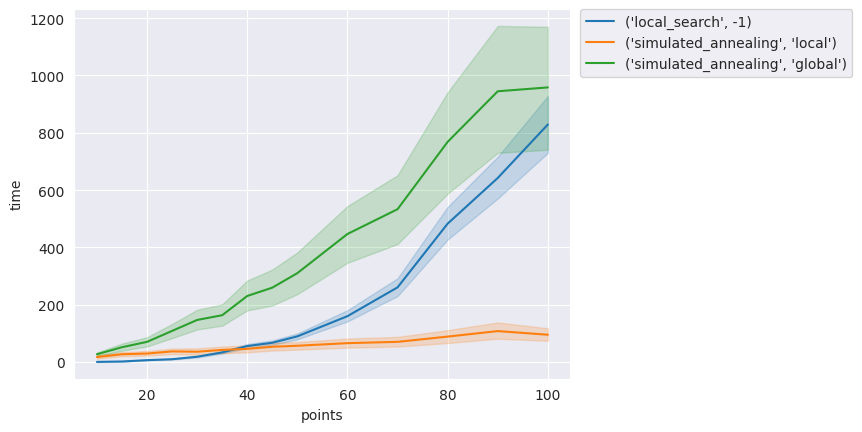

In [6]:
# draw time = f(number of points) for each algorithm
sns.lineplot(data=opt_df, x="points", y="time",\
             hue=opt_df[['opt_algorithm', 'lgs']].apply(tuple, axis=1))

# setup legend location
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### Comments

Tests above are on all available point sets from size 10 to 100.

Notice that the y axis (time) is in miliseconds.

From the plot above we draw the following conclusions on the speed of the algorithms:
- The simulated annealing with local search algorithm is the fastest
- Followed by the local search algorithm
- Followed by the simulated annealing with global search algorithm

Generally the algorithms are quite slower than the polygonization algorithms. Notice how we are already at about one second of run time on 100 points. The only algorithm that can potentially be used on larger point sets is simulated annealing with global step.

Also notice that local search has some deviation which is due to L (ranging from 1 to 10) however it is not that substantial. So it is most likely ok to use L=10 for most cases. This due to the fact that as L increases the chances of finding a valid vertex swap gets lower.

Lastly the diviation in simulated annealing with global search is high due to the L factor (now ranging from 1000 to 10000). This diviation is expected as the L value now greatly affects run time because it is the number of iterations for the algorithm.

## Change on poly area to CH area ratio

### Plots

Plot ratio change

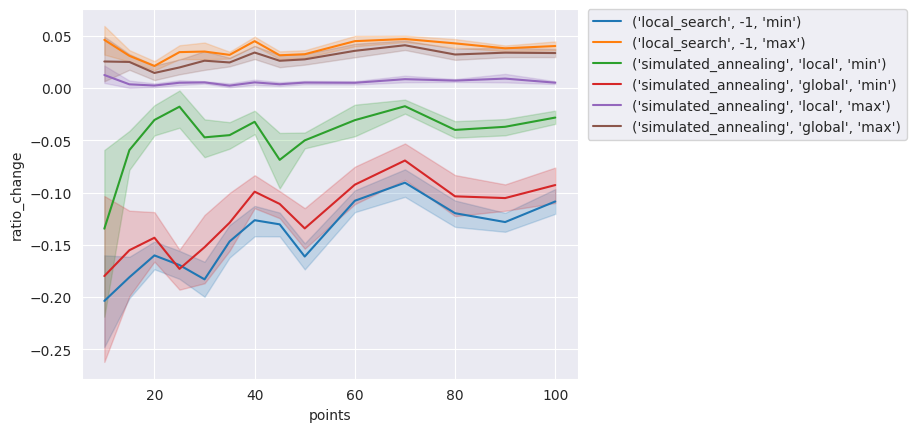

In [7]:
# draw ratio_change = f(number of points) for each (algorithm,minmax) combination
sns.lineplot(data=opt_df, x="points", y="ratio_change",\
             hue=opt_df[['opt_algorithm', 'lgs','minmax']].apply(tuple, axis=1))

# setup legend location
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### Comments

Above we see that for maximization as well as minimization local search is slightly better than simulated annealing with global step, which is in turn significantly better than simulated annealing with local search.

## Change in poly to CH area ratio divided by time

### Plots

Plot ratio / time

(-0.01, 0.01)

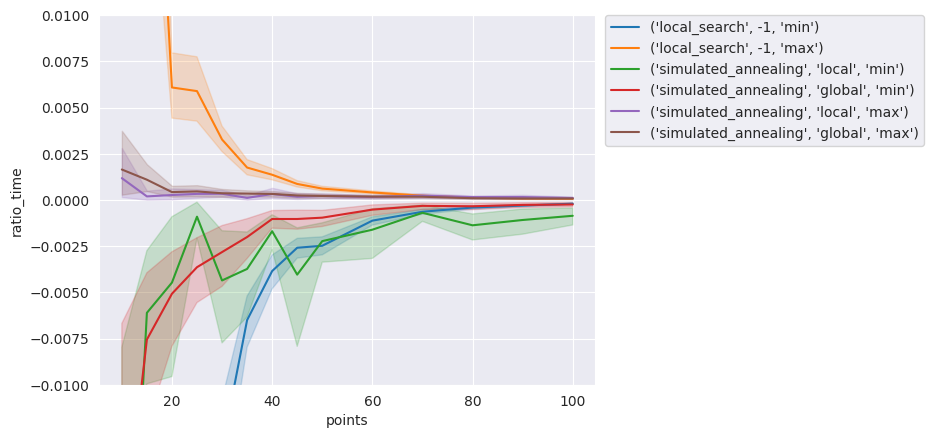

In [8]:
# draw poly_to_ch_ratio = f(number of points) for each (algorithm,edge_selection) combination
sns.lineplot(data=opt_df, x="points", y="ratio_time",\
             hue=opt_df[['opt_algorithm', 'lgs','minmax']].apply(tuple, axis=1))

# setup legend location
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylim(-0.01, 0.01)

(-0.002, 0.0004)

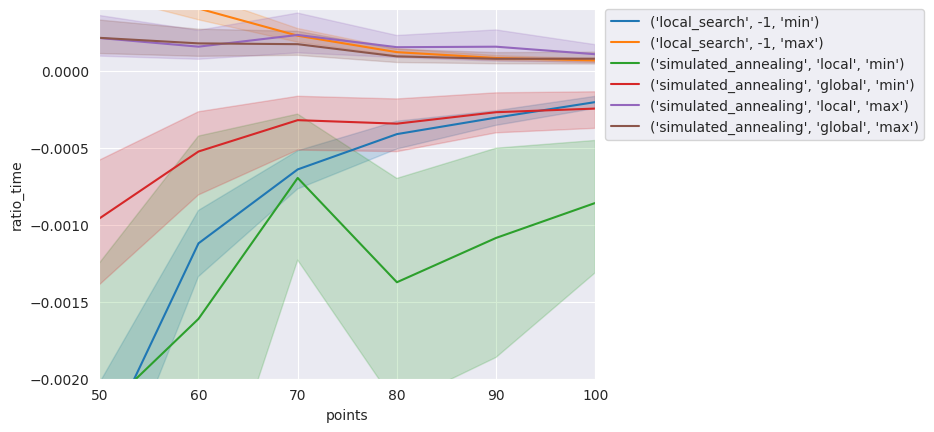

In [9]:
# draw poly_to_ch_ratio = f(number of points) for each (algorithm,edge_selection) combination
sns.lineplot(data=opt_df, x="points", y="ratio_time",\
             hue=opt_df[['opt_algorithm', 'lgs','minmax']].apply(tuple, axis=1))

# setup legend location
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlim(50,100)
plt.ylim(-0.002, 0.0004)

### Comments

Notice that the second plot is zoomed in.

We figured that a good indicator for the quality of the optimization algorithms would be the change in poly to CH ratio after the optimization divided by the run time of the algorithm. This value gives an expected value for how much better our polygon can get for every second the optimization algorithm runs.

Previousy it seemed as local search was better than simulated annealing with global step which was in turn better than simulated annealing with local step.

Now we see a different picture.

For maximization, all 3 algorithms are similarly efficient as the number of points increases.

For minimization, simulated annealing with local search seems to outperform the other two algorithms.

## Simulated annealing with subdivision

-> Get data on optimization <br>
-> Create data frame <br>
-> Process data

In [10]:
# get data on optimization
data_file = "lgs_data.csv"

# create data frame
lgs_df = pd.read_csv(data_file)

# rename some values for readability
lgs_df.loc[lgs_df['lgs'] == 1, 'lgs'] = 'local'
lgs_df.loc[lgs_df['lgs'] == 2, 'lgs'] = 'global'
lgs_df.loc[lgs_df['lgs'] == 3, 'lgs'] = 'subdiv'

# create a new feature "ratio_time" equal to the ratio cahnge devided by time
# seems like a good indicator for the quality of each algorithm
lgs_df['ratio_time'] = lgs_df.apply(lambda row: abs(row.ratio_change / row.time), axis=1)

Keep only features we need from polygonization algorithms and simulated annealing with subdivision

In [11]:
# keep features from poygonization algorithms
analise_poly_df = poly_df[["algorithm", "edge_selection","time","poly_to_ch_ratio","points"]].copy()
analise_poly_df.rename(columns={"edge_selection": "minmax", "poly_to_ch_ratio": "ratio"},inplace=True)

# keep features from simulated annealing
analise_lgs_df = lgs_df[["opt_algorithm", "minmax","lgs","time","ratio","points"]].copy()
analise_lgs_df["algorithm"]=lgs_df.apply(lambda row: row.opt_algorithm+"_"+row.lgs, axis=1)
analise_lgs_df.drop(['opt_algorithm','lgs'], axis=1,inplace=True)

# merge the two dataframes
lgs_poly_df=pd.concat([analise_lgs_df, analise_poly_df])

## Run times

### Plots

Plot run times

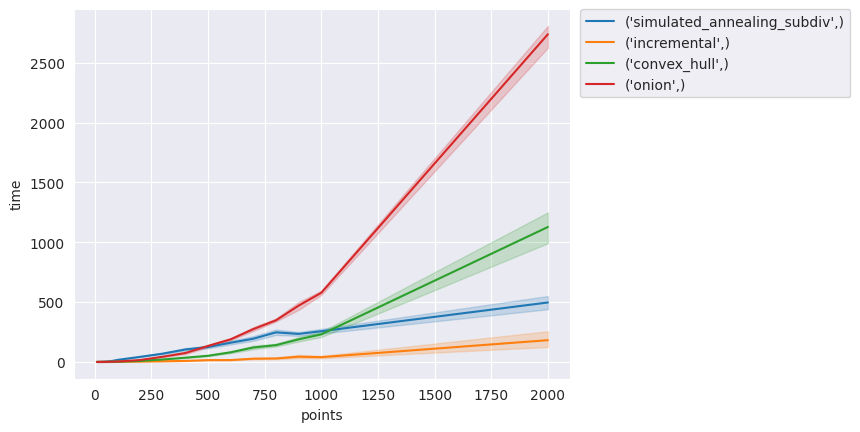

In [12]:
# draw time = f(number of points) for the algorithm
sns.lineplot(data=lgs_poly_df, x="points", y="time",\
             hue=lgs_poly_df[['algorithm']].apply(tuple, axis=1))

# setup legend location
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### Comments

Running simulated annealing with subdivision can be analised similarly to a polygonization algorithm. The process is we break the point set into subsets, we polygonize each subset, we optimize each subset and finally we connect them. So it is not as meaningfull to calculate the ratio change for each subset. Also the optimization algorithm we use is simulated annealing with local step, which we have analised above.

Above we see that the algorithm is quite competitive compared to the polygonization algorithms. It is better than onion and convex_hull and slightly slower than incremental.

## Poly area to CH area ratios

### Plots

Plot poly to ch ratio

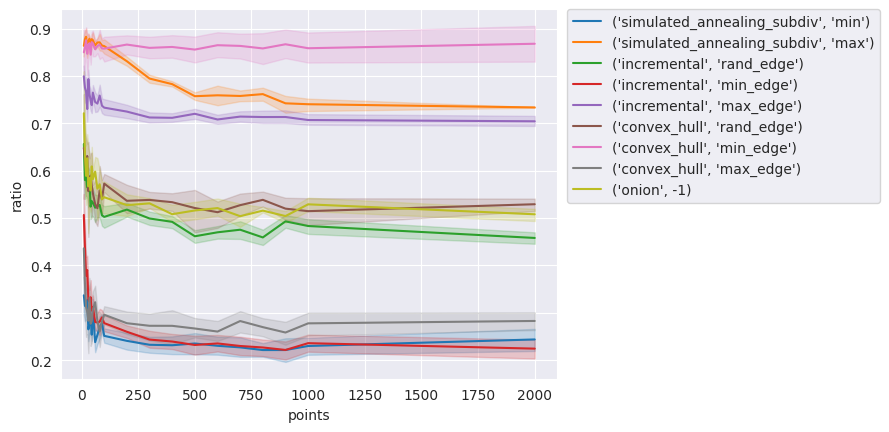

In [13]:
# draw poly_to_ch_ratio = f(number of points) for each (algorithm,edge_selection) combination
sns.lineplot(data=lgs_poly_df, x="points", y="ratio",\
             hue=lgs_poly_df[['algorithm', 'minmax']].apply(tuple, axis=1))

# setup legend location
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### Comments

The simulated annealing with subdivision (orange and blue lines) seems to also be comeptitive at creating maximal and minimal polygons compared to the incremental and convex hull algorithms. 

The maximal polygon is about as good as the one we get with incremental (about 0.7 ratio) and still worse than the one we get with convex hull (about 0.85 ratio). 

The minimal polygon is about as good as the one we get with incremental (about 0.25 ratio).